In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [27]:
df =pd.read_csv('NationalSurveyData.csv')
df.tail()

,SAMPLE_ID,SAMPLE_FIELD_ID,SAMPLE_DATE,LAT_DEG,LONG_DEG,YEAR_CONSTRUCTION,WELL_TYPE,WELL_DEPTH,DIVISION,DISTRICT,...,Li,Mg,Mn,Na,P_,Si,SO4,Sr,V_,Zn
3529,S99_07379,RIP7379,05/07/1999,24.7733,88.8000,1998.0,TARA,33.5,Rajshahi,Naogaon,...,0.010,12.60,1.010,30.4,0.1,26.5,2.4,0.153,0.002,0.038
3530,S99_07380,RIP7380,05/07/1999,24.7183,88.7750,1992.0,TARA,34.4,Rajshahi,Naogaon,...,0.022,18.60,0.346,237.0,0.2,24.7,0.2,0.263,0.002,0.016
3531,S99_07381,RIP7381,05/07/1999,25.1039,88.5713,1987.0,HTW,59.4,Rajshahi,Naogaon,...,0.005,11.20,0.125,17.4,0.1,15.7,0.6,0.170,0.002,0.032
3532,S99_07382,RIP7382,05/07/1999,25.0296,88.6054,1994.0,TARA,42.7,Rajshahi,Naogaon,...,0.005,9.28,0.234,28.0,0.1,29.6,0.5,0.163,0.002,0.017
3533,S99_07383,RIP7383,05/07/1999,25.0492,88.5857,1988.0,TARA,43.0,Rajshahi,Naogaon,...,0.006,7.23,0.464,20.9,0.1,22.4,0.2,0.101,0.002,0.533


In [6]:
df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3475 entries, 0 to 3533
Data columns (total 34 columns):
SAMPLE_ID            3475 non-null object
SAMPLE_FIELD_ID      3475 non-null object
SAMPLE_DATE          3475 non-null object
LAT_DEG              3475 non-null float64
LONG_DEG             3475 non-null float64
YEAR_CONSTRUCTION    3475 non-null float64
WELL_TYPE            3475 non-null object
WELL_DEPTH           3475 non-null float64
DIVISION             3475 non-null object
DISTRICT             3475 non-null object
THANA                3475 non-null object
UNION                3475 non-null object
MOUZA                3475 non-null object
GEOCODE              3475 non-null int64
As                   3475 non-null float64
Al                   3475 non-null float64
B_                   3475 non-null float64
Ba                   3475 non-null float64
Ca                   3475 non-null float64
Co                   3475 non-null float64
Cr                   3475 non-null float64
C

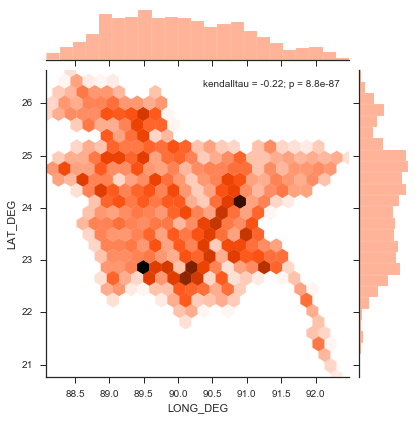

In [4]:
from scipy.stats import kendalltau
import seaborn as sns
sns.set(style="ticks")
sns.jointplot(df['LONG_DEG'], df['LAT_DEG'], kind="hex", stat_func=kendalltau, color="#FF4500")

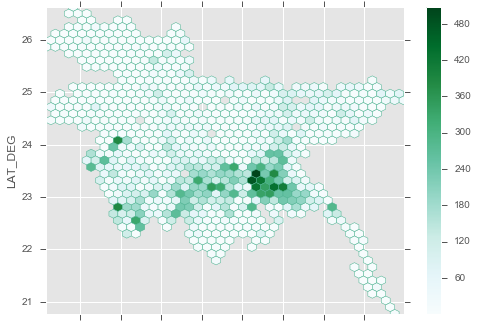

In [5]:
plt.style.use('ggplot')
df.plot.hexbin(x='LONG_DEG', y='LAT_DEG', C='As',edgecolors='#4CB391', reduce_C_function=np.mean,gridsize=40,color="#4CB391")

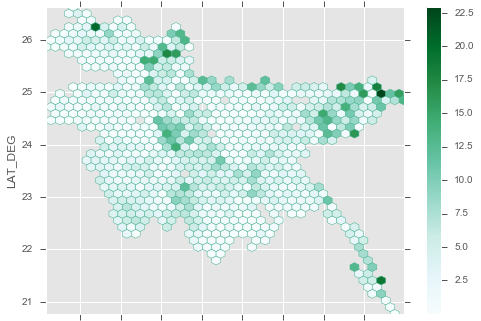

In [6]:
df.plot.hexbin(x='LONG_DEG', y='LAT_DEG', C='Fe', reduce_C_function=np.mean,gridsize=40,color="#4CB391")

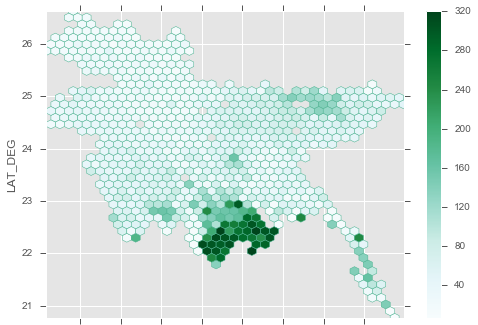

In [7]:
df.plot.hexbin(x='LONG_DEG', y='LAT_DEG', C='WELL_DEPTH', reduce_C_function=np.mean,gridsize=40,color="#4CB391")

In [9]:
#copy to make correlation plot: r=-1; means -ve slope and y is inversly propotional to x and r=1, +ve slope and y prop. x.  
cdf=df[['WELL_DEPTH','As','Al','B_','Ba','Ca','Co','Cr','Cu','Fe','Mn','K_','Mg','Si','SO4','Zn']]
cdf.head()

,WELL_DEPTH,As,Al,B_,Ba,Ca,Co,Cr,Cu,Fe,Mn,K_,Mg,Si,SO4,Zn
0,10.7,13.0,0.04,0.27,0.096,49.6,0.008,0.02,0.008,1.170,0.624,11.1,32.7,12.2,1.2,0.049
1,12.2,256.0,0.04,0.04,0.010,56.9,0.008,0.02,0.008,1.740,0.447,6.9,29.9,13.9,0.2,0.031
2,12.2,38.0,0.04,0.26,0.013,16.6,0.008,0.02,0.008,0.317,0.231,7.1,15.7,13.8,1.5,0.021
3,262.1,8.0,0.04,0.03,0.383,111.0,0.008,0.02,0.008,9.460,0.294,6.9,75.8,27.2,4.9,0.067
4,7.9,6.0,0.07,0.82,0.073,81.0,0.008,0.02,0.008,0.590,1.170,30.2,124.0,10.3,265.0,0.054


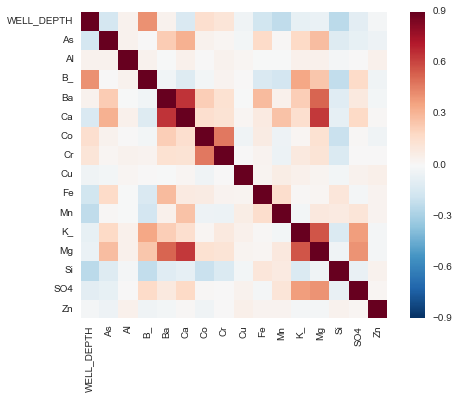

In [11]:
import seaborn as sns
corrmat=cdf.corr()
sns.heatmap(corrmat, vmax=.9, square=True)

In [28]:
import datashader as ds
import datashader.transfer_functions as tf

In [29]:
df['LAT_DEG'] = df['LAT_DEG'].astype(float)
df['LONG_DEG'] = df['LONG_DEG'].astype(float)
df['As'] = df['As'].astype(float)
df.dtypes

SAMPLE_ID             object
SAMPLE_FIELD_ID       object
SAMPLE_DATE           object
LAT_DEG              float64
LONG_DEG             float64
YEAR_CONSTRUCTION    float64
WELL_TYPE             object
WELL_DEPTH           float64
DIVISION              object
DISTRICT              object
THANA                 object
UNION                 object
MOUZA                 object
GEOCODE                int64
As                   float64
Al                   float64
B_                   float64
Ba                   float64
Ca                   float64
Co                   float64
Cr                   float64
Cu                   float64
Fe                   float64
K_                   float64
Li                   float64
Mg                   float64
Mn                   float64
Na                   float64
P_                   float64
Si                   float64
SO4                  float64
Sr                   float64
V_                   float64
Zn                   float64
dtype: object

In [30]:
from functools import partial
from datashader.utils import export_image
from datashader.colors import colormap_select, Greys9, Hot, viridis, inferno
from IPython.core.display import HTML, display

In [31]:
background = "black"
export = partial(export_image, background = background, export_path="export")
cm = partial(colormap_select, reverse=(background!="black"))

display(HTML("<style>.container { width:100% !important; }</style>"))

In [14]:
import plotly.plotly as py
import pandas as pd

#df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2015_06_30_precipitation.csv')

scl = [0,"rgb(150,0,90)"],[0.125,"rgb(0, 0, 200)"],[0.25,"rgb(0, 25, 255)"],\
[0.375,"rgb(0, 152, 255)"],[0.5,"rgb(44, 255, 150)"],[0.625,"rgb(151, 255, 0)"],\
[0.75,"rgb(255, 234, 0)"],[0.875,"rgb(255, 111, 0)"],[1,"rgb(255, 0, 0)"]

data = [ dict(
    lat = df['LAT_DEG'],
    lon = df['LONG_DEG'],
    text = df['As'].astype(str) + ' inches',
    marker = dict(
        color = df['As'],
        colorscale = scl,
        reversescale = True,
        opacity = 0.7,
        size = 2,        
        colorbar = dict(
            thickness = 10,
            titleside = "right",
            outlinecolor = "rgba(68, 68, 68, 0)",
            ticks = "outside",
            ticklen = 3,
            showticksuffix = "last",
            ticksuffix = " inches",
            dtick = 0.1
        ),                
    ),
    type = 'scattergeo'
) ]

layout = dict(
    geo = dict(
        scope = 'south asia',
        showland = True,
        landcolor = "rgb(212, 212, 212)",
        subunitcolor = "rgb(255, 255, 255)",
        countrycolor = "rgb(255, 255, 255)",
        showlakes = True,
        lakecolor = "rgb(255, 255, 255)",
        showsubunits = True,
        showcountries = True,
        resolution = 50,
        projection = dict(
            type = 'conic conformal',
            rotation = dict(
                lon = 90.399452
            )
        ),
        lonaxis = dict(
            showgrid = True,
            gridwidth = 0.5,
            range= [ 88.0, 93.2 ],
            dtick = 5
        ),
        lataxis = dict (
            showgrid = True,
            gridwidth = 0.5,
            range= [ 20., 27.0 ],
            dtick = 5
        )
    ),
    title = 'Bangladesh: Arsenic',
)
fig = { 'data':data, 'layout':layout }
py.iplot(fig, filename='precipitation')

MaskError: Mask and data not compatible: data size is 3534, mask size is 12489156.

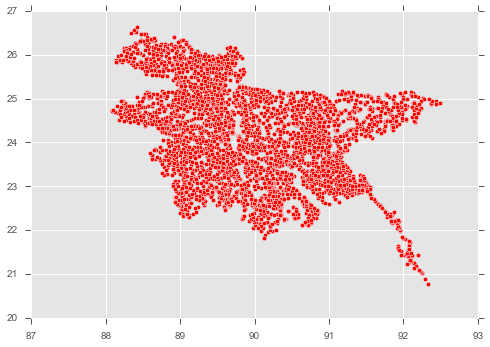

In [17]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
#from osgeo import gdal

from numpy import linspace
from numpy import meshgrid

map = Basemap(projection='tmerc', 
              lat_0=23, lon_0=90.399452,
              llcrnrlon=88.0, 
              llcrnrlat=20.0, 
              urcrnrlon=93.2, 
              urcrnrlat=27)

#ds = gdal.Open("../sample_files/dem.tiff")
#data = ds.ReadAsArray()

y = df['LAT_DEG'].values
x = df['LONG_DEG'].values
z = df['As'].values

plt.scatter(x,y,c='r')
xx, yy =np.meshgrid(x,y)

map.contourf(xx, yy, z)

plt.show()


# Species distribution modeling


Modeling species' geographic distributions is an important
problem in conservation biology. In this example we
model the geographic distribution of two south american
mammals given past observations and 14 environmental
variables. Since we have only positive examples (there are
no unsuccessful observations), we cast this problem as a
density estimation problem and use the `OneClassSVM` provided
by the package `sklearn.svm` as our modeling tool.
The dataset is provided by Phillips et. al. (2006).
If available, the example uses
`basemap <http://matplotlib.org/basemap>`_
to plot the coast lines and national boundaries of South America.

The two species are:

 - `"Bradypus variegatus"
   <http://www.iucnredlist.org/details/3038/0>`_ ,
   the Brown-throated Sloth.

 - `"Microryzomys minutus"
   <http://www.iucnredlist.org/details/13408/0>`_ ,
   also known as the Forest Small Rice Rat, a rodent that lives in Peru,
   Colombia, Ecuador, Peru, and Venezuela.

References
----------

 * `"Maximum entropy modeling of species geographic distributions"
   <http://www.cs.princeton.edu/~schapire/papers/ecolmod.pdf>`_
   S. J. Phillips, R. P. Anderson, R. E. Schapire - Ecological Modelling,
   190:231-259, 2006.


In [ ]:
# Authors: Peter Prettenhofer <peter.prettenhofer@gmail.com>
#          Jake Vanderplas <vanderplas@astro.washington.edu>
#
# License: BSD 3 clause

from __future__ import print_function

from time import time

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets.base import Bunch
from sklearn.datasets import fetch_species_distributions
from sklearn.datasets.species_distributions import construct_grids
from sklearn import svm, metrics

# if basemap is available, we'll use it.
# otherwise, we'll improvise later...
try:
    from mpl_toolkits.basemap import Basemap
    basemap = True
except ImportError:
    basemap = False

print(__doc__)


def create_species_bunch(species_name, train, test, coverages, xgrid, ygrid):
    """Create a bunch with information about a particular organism

    This will use the test/train record arrays to extract the
    data specific to the given species name.
    """
    bunch = Bunch(name=' '.join(species_name.split("_")[:2]))
    species_name = species_name.encode('ascii')
    points = dict(test=test, train=train)

    for label, pts in points.items():
        # choose points associated with the desired species
        pts = pts[pts['species'] == species_name]
        bunch['pts_%s' % label] = pts

        # determine coverage values for each of the training & testing points
        ix = np.searchsorted(xgrid, pts['dd long'])
        iy = np.searchsorted(ygrid, pts['dd lat'])
        bunch['cov_%s' % label] = coverages[:, -iy, ix].T

    return bunch


def plot_species_distribution(species=("bradypus_variegatus_0",
                                       "microryzomys_minutus_0")):
    """
    Plot the species distribution.
    """
    if len(species) > 2:
        print("Note: when more than two species are provided,"
              " only the first two will be used")

    t0 = time()

    # Load the compressed data
    data = fetch_species_distributions()

    # Set up the data grid
    xgrid, ygrid = construct_grids(data)

    # The grid in x,y coordinates
    X, Y = np.meshgrid(xgrid, ygrid[::-1])

    # create a bunch for each species
    BV_bunch = create_species_bunch(species[0],
                                    data.train, data.test,
                                    data.coverages, xgrid, ygrid)
    MM_bunch = create_species_bunch(species[1],
                                    data.train, data.test,
                                    data.coverages, xgrid, ygrid)

    # background points (grid coordinates) for evaluation
    np.random.seed(13)
    background_points = np.c_[np.random.randint(low=0, high=data.Ny,
                                                size=10000),
                              np.random.randint(low=0, high=data.Nx,
                                                size=10000)].T

    # We'll make use of the fact that coverages[6] has measurements at all
    # land points.  This will help us decide between land and water.
    land_reference = data.coverages[6]

    # Fit, predict, and plot for each species.
    for i, species in enumerate([BV_bunch, MM_bunch]):
        print("_" * 80)
        print("Modeling distribution of species '%s'" % species.name)

        # Standardize features
        mean = species.cov_train.mean(axis=0)
        std = species.cov_train.std(axis=0)
        train_cover_std = (species.cov_train - mean) / std

        # Fit OneClassSVM
        print(" - fit OneClassSVM ... ", end='')
        clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.5)
        clf.fit(train_cover_std)
        print("done.")

        # Plot map of South America
        plt.subplot(1, 2, i + 1)
        if basemap:
            print(" - plot coastlines using basemap")
            m = Basemap(projection='cyl', llcrnrlat=Y.min(),
                        urcrnrlat=Y.max(), llcrnrlon=X.min(),
                        urcrnrlon=X.max(), resolution='c')
            m.drawcoastlines()
            m.drawcountries()
        else:
            print(" - plot coastlines from coverage")
            plt.contour(X, Y, land_reference,
                        levels=[-9999], colors="k",
                        linestyles="solid")
            plt.xticks([])
            plt.yticks([])

        print(" - predict species distribution")

        # Predict species distribution using the training data
        Z = np.ones((data.Ny, data.Nx), dtype=np.float64)

        # We'll predict only for the land points.
        idx = np.where(land_reference > -9999)
        coverages_land = data.coverages[:, idx[0], idx[1]].T

        pred = clf.decision_function((coverages_land - mean) / std)[:, 0]
        Z *= pred.min()
        Z[idx[0], idx[1]] = pred

        levels = np.linspace(Z.min(), Z.max(), 25)
        Z[land_reference == -9999] = -9999

        # plot contours of the prediction
        plt.contourf(X, Y, Z, levels=levels, cmap=plt.cm.Reds)
        plt.colorbar(format='%.2f')

        # scatter training/testing points
        plt.scatter(species.pts_train['dd long'], species.pts_train['dd lat'],
                    s=2 ** 2, c='black',
                    marker='^', label='train')
        plt.scatter(species.pts_test['dd long'], species.pts_test['dd lat'],
                    s=2 ** 2, c='black',
                    marker='x', label='test')
        plt.legend()
        plt.title(species.name)
        plt.axis('equal')

        # Compute AUC with regards to background points
        pred_background = Z[background_points[0], background_points[1]]
        pred_test = clf.decision_function((species.cov_test - mean)
                                          / std)[:, 0]
        scores = np.r_[pred_test, pred_background]
        y = np.r_[np.ones(pred_test.shape), np.zeros(pred_background.shape)]
        fpr, tpr, thresholds = metrics.roc_curve(y, scores)
        roc_auc = metrics.auc(fpr, tpr)
        plt.text(-35, -70, "AUC: %.3f" % roc_auc, ha="right")
        print("\n Area under the ROC curve : %f" % roc_auc)

    print("\ntime elapsed: %.2fs" % (time() - t0))


plot_species_distribution()
plt.show()

In [ ]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from numpy import array
from numpy import max


map = Basemap(llcrnrlon=-0.5,llcrnrlat=39.8,urcrnrlon=4.,urcrnrlat=43.,
             resolution='i', projection='tmerc', lat_0 = 23.0, lon_0 = 90)

plt.figure(3)

map.drawcoastlines()
map.readshapefile('../sample_files/comarques', 'comarques')

map.hexbin(x, y, dat, reduce_C_function = max, gridsize=20, mincnt=1, cmap='YlOrBr', linewidths=0.5, edgecolors='k')

map.colorbar(location='bottom', label='Mean amplitude (kA)')


In [49]:
import georasters as gr

In [50]:
raster = '/Users/moshiour/Documents/python_dev/bokeh-notebooks-master/examples-ds/bd_data/BGD_ppp_v2b_2015.tif'
data = gr.from_file(raster)

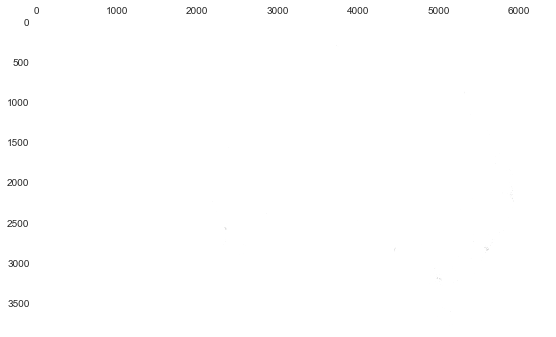

In [16]:
data.plot()

In [51]:
adf = data.to_pandas()

In [52]:
adf.tail(10)

,row,col,value,x,y
16323844,7259,5192,2.761077,92.334685,20.586054
16323845,7261,5193,2.714703,92.335518,20.584387
16323846,7263,5194,2.773474,92.336351,20.582721
16323847,7263,5195,2.747465,92.337185,20.582721
16323848,7264,5195,2.718293,92.337185,20.581887
16323849,7265,5195,2.731501,92.337185,20.581054
16323850,7266,5195,2.757182,92.337185,20.580221
16323851,7268,5194,2.731142,92.336351,20.578554
16323852,7269,5193,2.660838,92.335518,20.577721
16323853,7270,5194,2.681836,92.336351,20.576888


In [20]:
adf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24385622 entries, 0 to 24385621
Data columns (total 5 columns):
row      int64
col      int64
value    float32
x        float64
y        float64
dtypes: float32(1), float64(2), int64(2)
memory usage: 837.2 MB


In [44]:
adf.describe()

,row,col,value,x,y
count,2.438562e+07,2.438562e+07,2.438562e+07,2.438562e+07,2.438562e+07
mean,1.910000e+03,3.190500e+03,8.800638e-01,-6.625000e+05,-2.924000e+06
std,1.103028e+03,1.842325e+03,4.051028e+01,1.842325e+06,1.103028e+06
min,0.000000e+00,0.000000e+00,0.000000e+00,-3.853000e+06,-4.834000e+06
25%,9.550000e+02,1.595000e+03,0.000000e+00,-2.258000e+06,-3.879000e+06
50%,1.910000e+03,3.190500e+03,0.000000e+00,-6.625000e+05,-2.924000e+06
75%,2.865000e+03,4.786000e+03,0.000000e+00,9.330000e+05,-1.969000e+06
max,3.820000e+03,6.381000e+03,1.474770e+04,2.528000e+06,-1.014000e+06


In [53]:
from functools import partial
from datashader.utils import export_image
from datashader.colors import colormap_select, Greys9, Hot, viridis, inferno
from IPython.core.display import HTML, display

In [54]:
background = "black"
export = partial(export_image, background = background, export_path="export")
cm = partial(colormap_select, reverse=(background!="black"))

display(HTML("<style>.container { width:100% !important; }</style>"))

/Users/moshiour/anaconda/lib/python3.5/site-packages/datashader/transfer_functions.py:161: DeprecationWarning: `interpolate` is deprecated; use `shade` instead
  warnings.warn(w)


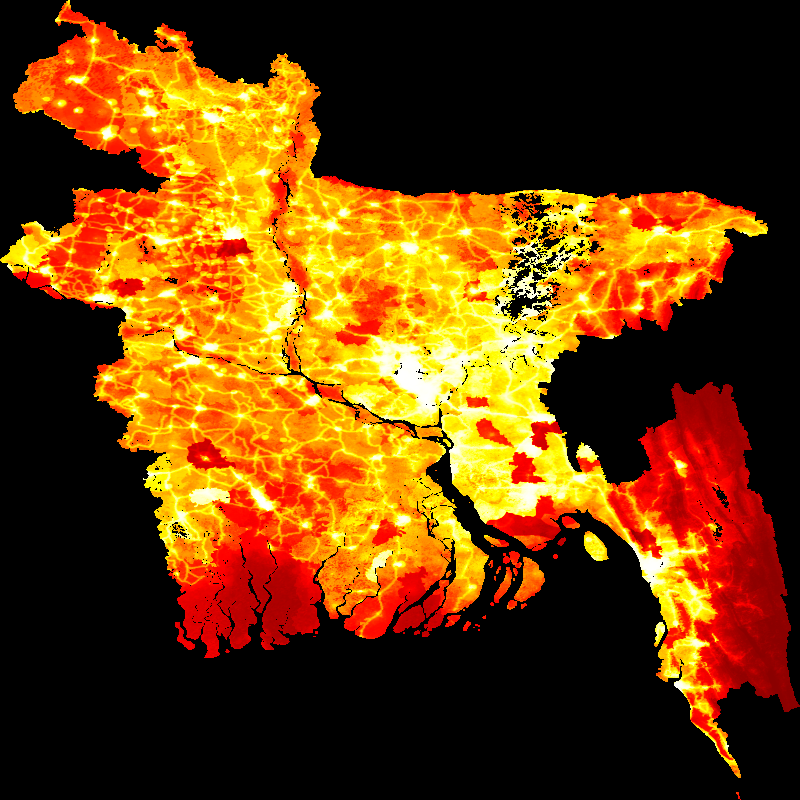

In [55]:
cvs = ds.Canvas(plot_width=800, plot_height=800)
agg = cvs.points(adf, 'x', 'y', ds.mean('value'))
img = tf.interpolate(agg, cmap=['lightblue', 'darkblue'], how='log')
export(tf.shade(agg, cmap = cm(Hot,0.2), how='eq_hist'),"Australian: Population density")

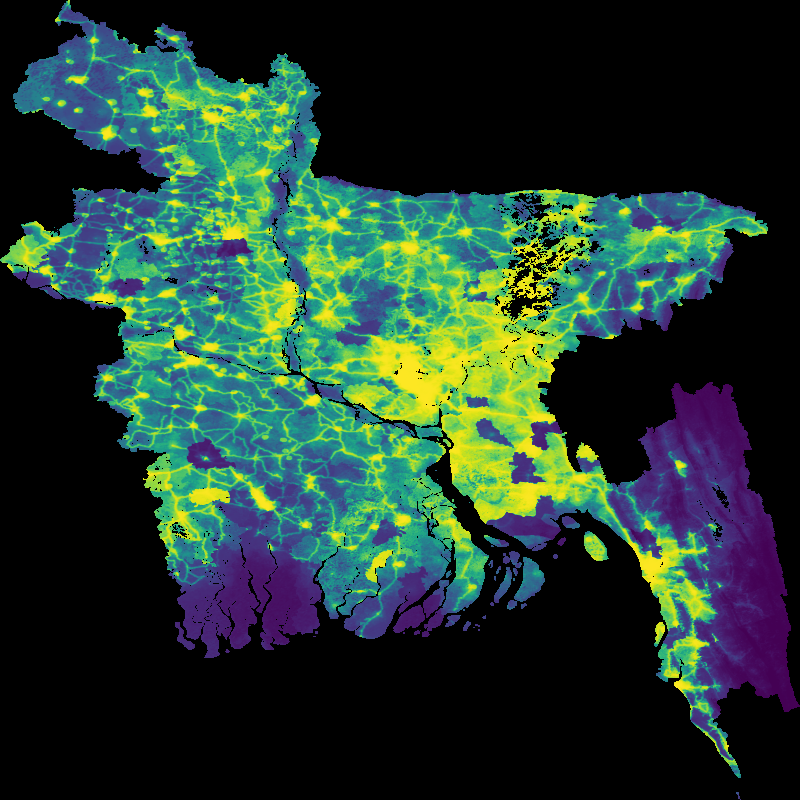

In [56]:
export(tf.shade(agg, cmap=cm(viridis), how='eq_hist'),"Australian: Population density1")

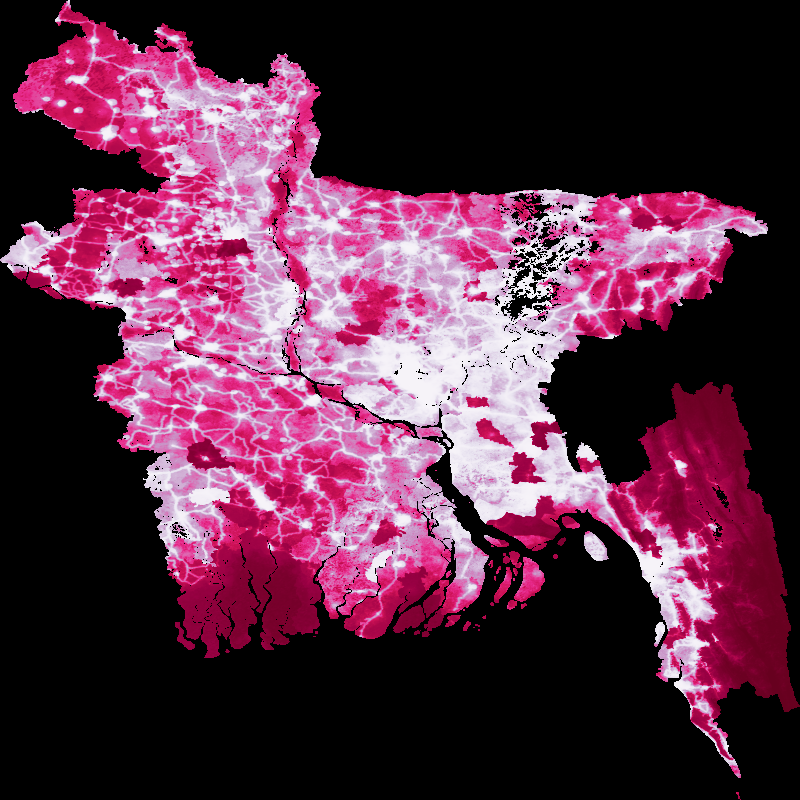

In [57]:
from bokeh.palettes import PuRd9
export(tf.shade(agg, cmap=cm(PuRd9), how='eq_hist'),"Australian: Population density2")